## Observations and Insights 

In [ ]:
SUMMARY OF THE STUDY
The study of effect of 9 drug regimens and 1 placebo regimen on squamous cell carcinoma was conducted on 249 mice with a gender bias of only 1% (male mice more than female mice)which is negligible. There were total of 1893 observations with 5  duplicate readings. We have used the cleaned data of 1888 observations. The study was more concentrated on  Capomulin’s effect on Tumour volume.
The keys conclusions of the study are:
1. The effectiveness of Ramicane is the best in reducing the tumour volume. Capomulin is comparable. But both have given more desirable results compared to  Infubinol and Ceftamine. This conclusion is based on the box plots of the final tumour volumes. The results of the study are very consistent,  as there is only 1 outlier in the data set of the four drug-regimens (Infubinol). 

2. The heavier the mouse, the less effective the drug is. This is a reliable conclusion because the r value is 0.84 (The relationship between two variables is generally considered strong when their r value is larger than 0.7. The correlation r measures the strength of the linear relationship between two quantitative variables.) This shows how much the the weight of the mouse determines the  drug’s effect on tumour volume. The positive slope of 0.95 reconfirms the above said relation between the dependent (tumour volume)and independent variables(mouse weight).
3. Capomulin treatment shows a remarkable reduction in tumour size in the first 35 days then a slight increase in next 2-3 days


In [651]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_ssc_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
combined_mouse_study_ssc_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [652]:
# Checking the number of mice.
combined_mouse_study_ssc_df['Mouse ID'].count()

1893

In [653]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
mouse_timepoint_duplicateRows=combined_mouse_study_ssc_df[combined_mouse_study_ssc_df.duplicated(['Mouse ID','Timepoint'])]

mouse_timepoint_duplicateRows 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [654]:
# Refined and cleaned Dataframe after removing the duplicate Mice by ID number and timepoint[this will be used for the analysis]
refined_data_for_analysis_df=combined_mouse_study_ssc_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
refined_data_for_analysis_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [655]:
#Mouse count in the refined data based on mouse ID and timepoint
refined_data_for_analysis_df['Mouse ID'].count()

1888

In [656]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_duplicateRows = combined_mouse_study_ssc_df[combined_mouse_study_ssc_df.duplicated(['Mouse ID'])]
mouse_duplicateRows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [657]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
count_mousessc_study_df= combined_mouse_study_ssc_df.drop_duplicates(subset=['Mouse ID'], keep='last')
count_mousessc_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [658]:
combined_mouse_study_ssc_df['Mouse ID'].nunique()

249

In [659]:
# Checking the number of mice in the clean DataFrame.
count_mousessc_study_df['Mouse ID'].count()

249

## Summary Statistics

In [660]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#This method produces everything in a single groupby function


Summary_stat_df=refined_data_for_analysis_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]]
Summary_stat_df.agg(['mean','median','var','std','sem']).round(3)

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.383  50.784  43.220  6.574  0.526
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

In [661]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_regimen_df= refined_data_for_analysis_df.groupby('Drug Regimen')
tumor_volume_mean = drug_regimen_df.mean()['Tumor Volume (mm3)']
tumor_volume_median=drug_regimen_df.median()['Tumor Volume (mm3)']
tumor_volume_variance=drug_regimen_df.var()['Tumor Volume (mm3)']
tumor_volume_stdv=drug_regimen_df.std()['Tumor Volume (mm3)']
tumor_volume_SEM=drug_regimen_df.sem()['Tumor Volume (mm3)']
summary_grouped_df = pd.DataFrame({'Mean': tumor_volume_mean, 'Median': tumor_volume_median,'Variance':tumor_volume_variance,
                                   'Standard Deviation': tumor_volume_stdv, 'SEM': tumor_volume_SEM})
summary_grouped_df.round(3)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.383,50.784,43.220,6.574,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


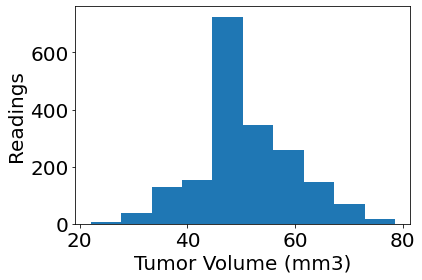

Mean of the study results is: 50.45
Median of the study results is: 48.95
Mode of the study results is: 0    45.0
dtype: float64
Standard deviation of the study results is: 8.9
Variance of the study results is: 79.29
SEM of the study results is: 0.2
NormaltestResult(statistic=27.209851006105687, pvalue=1.2344000405433942e-06)


In [662]:
# Tumor volume is normally distributed for the study

plt.hist(refined_data_for_analysis_df['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Readings')
plt.show()
print(f"Mean of the study results is: {round(refined_data_for_analysis_df['Tumor Volume (mm3)'].mean(),2)}")
print(f"Median of the study results is: {round(refined_data_for_analysis_df['Tumor Volume (mm3)'].median(),2)}")
print(f"Mode of the study results is: {round(refined_data_for_analysis_df['Tumor Volume (mm3)'].mode(),2)}")
print(f"Standard deviation of the study results is: {round(refined_data_for_analysis_df['Tumor Volume (mm3)'].std(),2)}")
print(f"Variance of the study results is: {round(refined_data_for_analysis_df['Tumor Volume (mm3)'].var(),2)}")
print(f"SEM of the study results is: {round(refined_data_for_analysis_df['Tumor Volume (mm3)'].sem(),2)}")
print(st.normaltest(refined_data_for_analysis_df['Tumor Volume (mm3)'].sample(1888)))

## Bar and Pie Charts

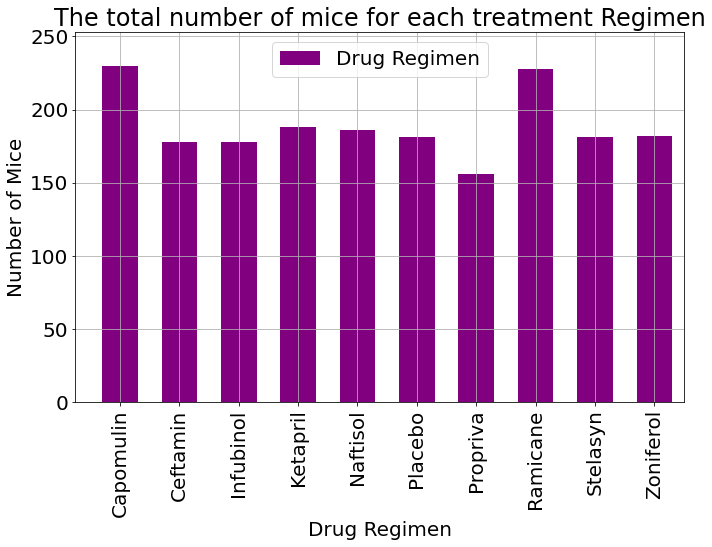

In [689]:

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher

drug_regimen_df = refined_data_for_analysis_df.groupby('Drug Regimen')
drug_regimen_count = pd.DataFrame(drug_regimen_df['Drug Regimen'].count())

x_axis = np.arange(len(drug_regimen_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,8))
plt.bar(x_axis, drug_regimen_count["Drug Regimen"], color='purple', align="center", width = 0.6)
plt.xticks(tick_locations, list(drug_regimen_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-0.5)
plt.ylim(0, max(drug_regimen_count["Drug Regimen"])*1.1)

# Set a Title and labels
plt.title("The total number of mice for each treatment Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.grid(zorder=0)
plt.tight_layout()
column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")
plt.savefig('Barchart')
plt.show()

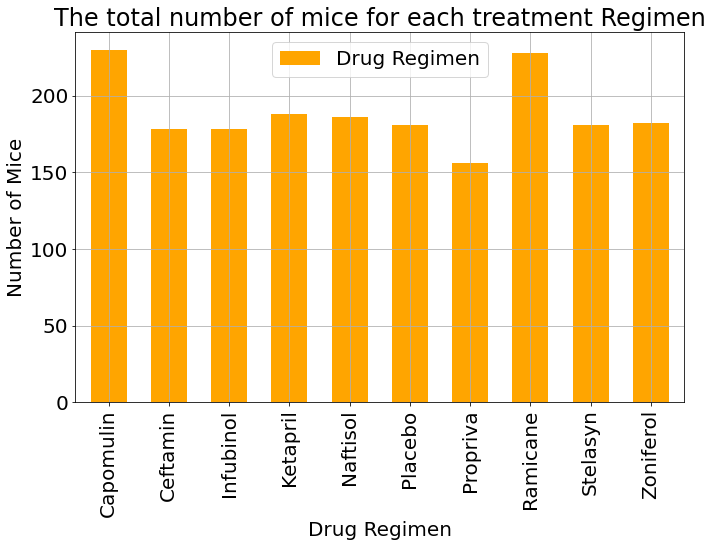

In [664]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas
drug_regimen_df = refined_data_for_analysis_df.groupby('Drug Regimen')
drug_regimen_count = pd.DataFrame(drug_regimen_df['Drug Regimen'].count())

# Create a bar chart based off of the group series from before and label the title
bar_plot =drug_regimen_count.plot(kind='bar', color="orange",width=0.6,align= 'center',figsize=(10,8))
# Set the xlabel and ylabel using class methods
bar_plot.set_xlabel('Drug Regimen')
bar_plot.set_ylabel('Number of Mice')
bar_plot.set_title("The total number of mice for each treatment Regimen")
bar_plot.grid(zorder=0)
plt.tight_layout()


<AxesSubplot:title={'center':'Distribution of female versus male mice'}, ylabel='Mouse ID'>

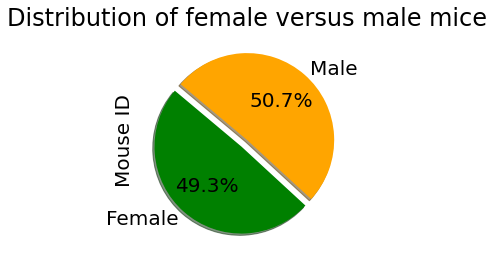

In [665]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_gender = refined_data_for_analysis_df.groupby("Sex")
mouse_count = df_gender['Mouse ID'].count().plot(kind='pie', y='Sex',title="Distribution of female versus male mice",startangle=140,autopct='%1.1f%%',shadow=True, fontsize=20, colors =["green","orange"],legend =False,explode=(0.1,0))

mouse_count

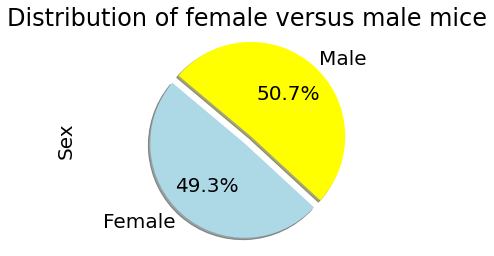

In [666]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df_gender = refined_data_for_analysis_df.groupby("Sex")
mouse_count=df_gender['Mouse ID'].count()
genders= list(mouse_count.index.values)
colors = ["lightblue", "yellow"]
explode=(0.1,0)
plt.pie(mouse_count, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,explode=explode)
plt.rcParams['font.size'] = 20
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [667]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatment_regimen_list=[ 'Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
summary_stat1_df=refined_data_for_analysis_df[refined_data_for_analysis_df["Drug Regimen"].isin(treatment_regimen_list)]
final_tumourvolume = summary_stat1_df.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max()
final_tumourvolume_df = pd.DataFrame(final_tumourvolume) 
drug_reg_df = pd.merge(summary_stat1_df, final_tumourvolume_df, on=('Drug Regimen','Mouse ID', 'Timepoint'), how='right').round(3)
drug_reg_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,45,38.983,2
1,b742,Capomulin,Male,7,21,45,38.940,0
2,f966,Capomulin,Male,16,17,20,30.486,0
3,g288,Capomulin,Male,3,19,45,37.074,1
4,g316,Capomulin,Female,22,22,45,40.159,2
...,...,...,...,...,...,...,...,...
95,s508,Ramicane,Male,1,17,45,30.276,0
96,u196,Ramicane,Male,18,25,45,40.668,3
97,w678,Ramicane,Female,5,24,5,43.166,0
98,y449,Ramicane,Male,19,24,15,44.183,0


In [668]:
# Method-2

treatment_regimen_list=[ 'Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

summary_stat1_df=refined_data_for_analysis_df[refined_data_for_analysis_df["Drug Regimen"].isin(treatment_regimen_list)]

drug_regimen1=summary_stat1_df.groupby(['Drug Regimen','Mouse ID']).agg(Final_Timepoint_Tumor_size_mm3=('Tumor Volume (mm3)', lambda x: list(x)[-1])).round(3)

drug_regimen1


Final_Timepoint_Tumor_size_mm3
Drug Regimen Mouse ID                                
Capomulin    b128                              38.983
             b742                              38.940
             f966                              30.486
             g288                              37.074
             g316                              40.159
...                                               ...
Ramicane     s508                              30.276
             u196                              40.668
             w678                              43.166
             y449                              44.183
             z578                              30.639

[100 rows x 1 columns]

In [669]:
# Put treatments into a list for for loop (and later for plot labels)
tumorvol_cap = []
tumorvol_ram = []
tumorvol_inf = []
tumorvol_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in drug_reg_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumorvol_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == 'Ramicane':
        tumorvol_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == 'Infubinol':
        tumorvol_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] =='Ceftamin' :
        tumorvol_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
#created a data frame with the tumor data of the drugs listed.
drug_df = pd.DataFrame({"Capomulin": tumorvol_cap,
                       'Ramicane': tumorvol_ram,
                       'Infubinol': tumorvol_inf,
                       'Ceftamin': tumorvol_cef
                       })
  
drug_df

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.983,38.408,67.973,62.999
1,38.940,43.048,65.526,45.000
2,30.486,38.810,57.032,56.058
3,37.074,32.979,66.083,55.743
4,40.159,38.342,72.227,48.722
5,47.686,33.398,36.321,47.785
6,37.312,37.311,60.970,61.849
7,38.125,40.659,62.435,68.923
8,38.753,29.128,60.919,67.749
9,41.483,33.562,67.290,57.918


In [670]:
# Do quartile calculations for each drug
  
treatment_regimen_list=[ 'Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
   
counter=[]
for drug in treatment_regimen_list:
    quartiles = drug_df [drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    midq = quartiles[.5].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    max_cef = drug_df[drug].max()
    min_cef = drug_df[drug].min()
    
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of tumor volume for {drug} is: {lowerq}")
    print(f"The upper quartile of tumor volume for {drug} is: {upperq}")
    print(f"The median of tumor volume for {drug} is: {midq}")
    print(f"The interquartile range of tumor volume for {drug} is: {iqr}")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"The maximum value  of tumor volume for {drug} is: {max_cef}")
    print(f"The minimum value  of tumor volume for {drug} is: {min_cef}")
    print(f"--------------------------------------------------------")


Capomulin IQR data is:
The lower quartile of tumor volume for Capomulin is: 32.38
The upper quartile of tumor volume for Capomulin is: 40.16
The median of tumor volume for Capomulin is: 38.12
The interquartile range of tumor volume for Capomulin is: 7.78
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
The maximum value  of tumor volume for Capomulin is: 47.686
The minimum value  of tumor volume for Capomulin is: 23.344
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of tumor volume for Ramicane is: 31.56
The upper quartile of tumor volume for Ramicane is: 40.66
The median of tumor volume for Ramicane is: 36.56
The interquartile range of tumor volume for Ramicane is: 9.1
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
The maximum value  of tumor volume for Ramicane is: 45.221
The minimum value  of tumor volume for Ramicane is: 22

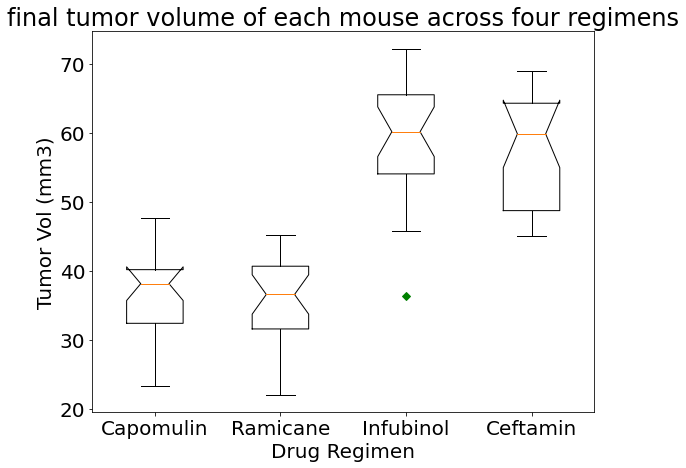

In [671]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_list =   [ drug_df['Capomulin'],
                drug_df['Ramicane'],
                drug_df['Infubinol'],
                drug_df['Ceftamin']
              ]
               
fig1, ax = plt.subplots(figsize=(9,7))               
ax.set_title('final tumor volume of each mouse across four regimens') 
ax.set_xlabel('Drug Regimen') 
ax.set_ylabel('Tumor Vol (mm3)')                               
    
ax.boxplot(plot_list,notch=True,sym='gD')              
plt.xticks([1,2,3,4],treatment_regimen_list ) 
# set labels of each boxplot
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

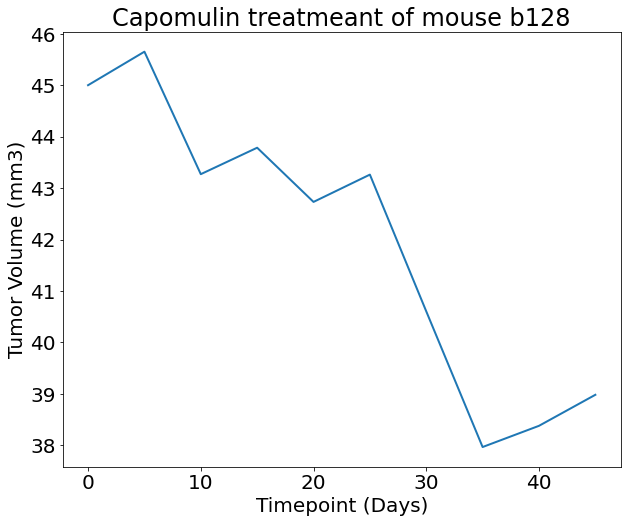

In [686]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = refined_data_for_analysis_df.loc[refined_data_for_analysis_df['Drug Regimen'] == 'Capomulin']
Capoline_df = capomulin_data.loc[capomulin_data["Mouse ID"] == "b128",:]
Capoline_df
# defined the x axis list by calling the timepoints from the l509 dataframe
x_axisTP = Capoline_df["Timepoint"] 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
tumsize = Capoline_df["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse b128') # created title
# the plot function plt.plot() with x and y values and customizations
plt.plot(x_axisTP, tumsize,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.rcParams["figure.figsize"] = [10,8]
plt.savefig('linechart')
plt.show()

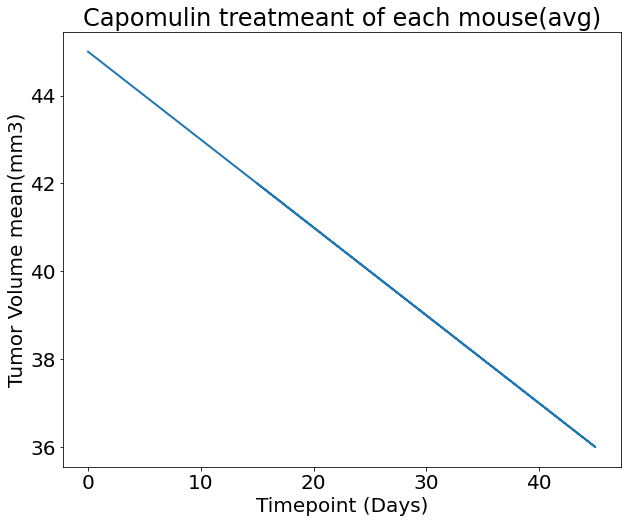

In [685]:
cap_tumor_data = capomulin_data.groupby(['Timepoint']).agg(Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean)).round(0)
cap_tumor_data1= pd.merge(cap_tumor_data, capomulin_data, on=( 'Timepoint'), how='right').round(3)
# View the groupby dataframe 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
cap_tumor_data1
x_axisTP = cap_tumor_data1["Timepoint"] 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
tumsize = cap_tumor_data1['Tumor_Vol_Mean'] 

plt.title('Capomulin treatmeant of each mouse(avg)') # created title
# the plot function plt.plot() with x and y values and customizations
plt.plot(x_axisTP, tumsize,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume mean(mm3)')
plt.rcParams["figure.figsize"] = [10,8]
plt.savefig('linechart')
plt.show()


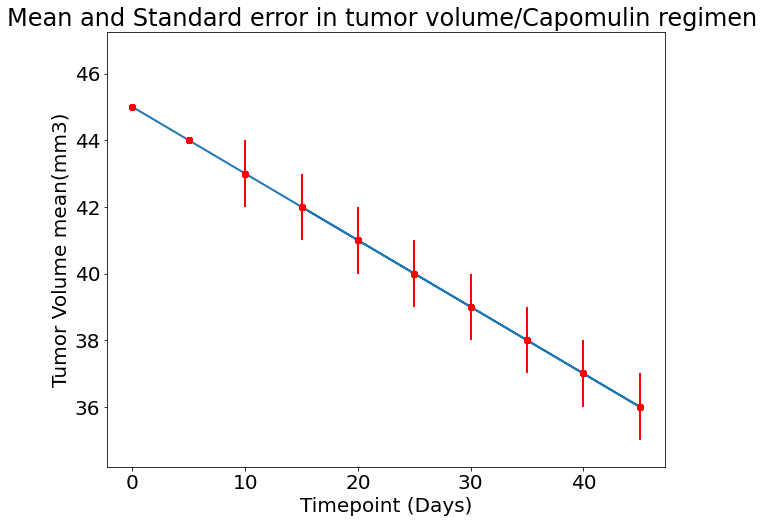

In [695]:
cap_tumor_data2 = capomulin_data.groupby(['Timepoint']).agg(Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)).round(0)
cap_tumor_data3= pd.merge(cap_tumor_data2, capomulin_data, on=( 'Timepoint'), how='right').round(3)
# View the groupby dataframe 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
cap_tumor_data3
x_axisTP = cap_tumor_data3["Timepoint"] 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
tumsize = cap_tumor_data3['Tumor_Vol_Mean'] 
yerr= cap_tumor_data3['Tumor_Vol_SEM']
plt.title('Mean and Standard error in tumor volume/Capomulin regimen ') 
# created title
# the plot function plt.plot() with x and y values and customizations
plt.xlim(min(x_axisTP)-max(x_axisTP)*0.05, max(x_axisTP)*1.05)
plt.ylim(min(tumsize)*0.95, max(tumsize)*1.05)
plt.rcParams["figure.figsize"] = [10,8]
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume mean(mm3)')
plt.errorbar(x_axisTP ,tumsize, yerr, fmt="o", color="red",
            alpha=0.5, label="Tumor_Vol_SEM")

plt.plot(x_axisTP, tumsize,linewidth=2, markersize=12)             







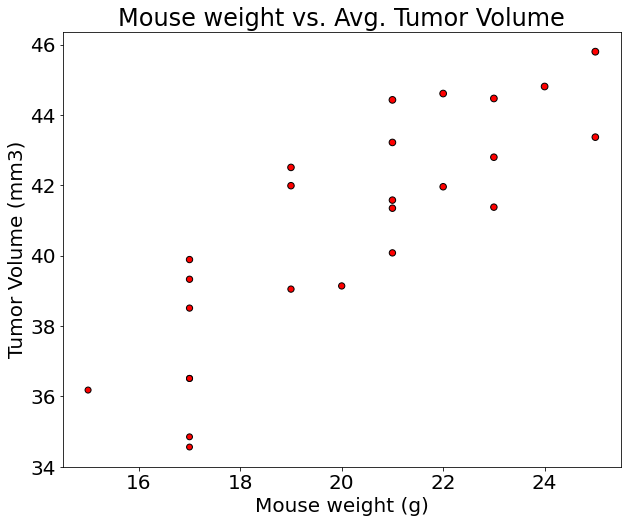

,mouse_weight_Mean,Tumor_vol_mean
Mouse ID,,
b128,22.0,41.96
b742,21.0,40.08
f966,17.0,36.51
g288,19.0,41.99
g316,22.0,44.61
i557,24.0,44.81
i738,20.0,39.14
j119,23.0,44.47
j246,21.0,43.22


<Figure size 720x576 with 0 Axes>

In [690]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_weightvol_data = capomulin_data.groupby(['Mouse ID']).agg(mouse_weight_Mean=('Weight (g)',np.mean),Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)).round(2)
plt.scatter(
    cap_weightvol_data['mouse_weight_Mean'],
    cap_weightvol_data['Tumor_vol_mean'],
    marker='o',
    facecolors='red',
    edgecolors='black',
    s=cap_weightvol_data['Tumor_vol_mean'],
    alpha=1)

# Create a title, x label, and y label for our chart
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.rcParams["figure.figsize"] = [10,8]
plt.show()
plt.savefig('Scatter Plot')
cap_weightvol_data

## Correlation and Regression

In [513]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlationWV = st.pearsonr(cap_weightvol_data['mouse_weight_Mean'],cap_weightvol_data['Tumor_vol_mean'])
print(f"The correlation between AVG.WEIGHT of MOUSE and TUMOR MEAN VOLUME is {(correlationWV[0])}")

The correlation between AVG.WEIGHT of MOUSE and TUMOR MEAN VOLUME is 0.8313352435843114


In [518]:
st.linregress(cap_weightvol_data['mouse_weight_Mean'],cap_weightvol_data['Tumor_vol_mean'])

LinregressResult(slope=0.9542473555736373, intercept=21.55614320585842, rvalue=0.8418558779004007, pvalue=1.3297811707245942e-07, stderr=0.1275597466803127, intercept_stderr=2.59131589533922)

The equation of the regression line is: y = 0.95x + 21.56
The values acroos the slope of the regression line is: Mouse ID
b128    42.54942
b742    41.59518
f966    37.77822
g288    39.68670
g316    42.54942
i557    44.45790
i738    40.64094
j119    43.50366
j246    41.59518
l509    41.59518
l897    39.68670
m601    37.77822
m957    39.68670
r157    45.41214
r554    37.77822
r944    45.41214
s185    37.77822
s710    43.50366
t565    37.77822
u364    37.77822
v923    41.59518
w150    43.50366
w914    41.59518
x401    35.86974
y793    37.77822
Name: mouse_weight_Mean, dtype: float64


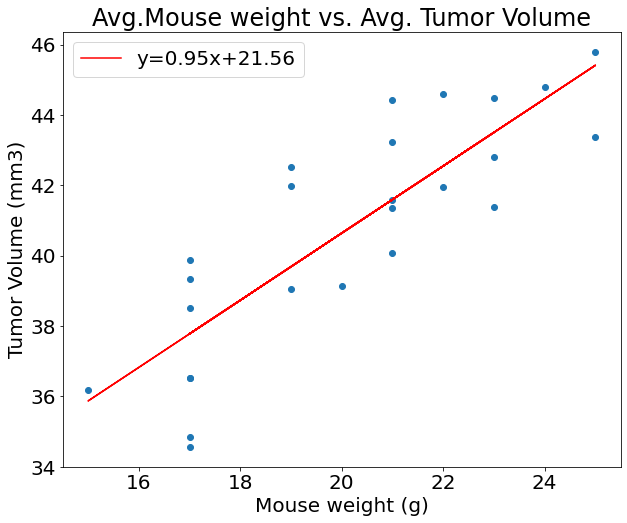

In [691]:
x_values = cap_weightvol_data['mouse_weight_Mean']
y_values = cap_weightvol_data['Tumor_vol_mean']
slope=0.95424
intercept=21.55614
line_reg = slope*(cap_weightvol_data['mouse_weight_Mean'])+intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)

plt.plot(cap_weightvol_data['mouse_weight_Mean'], line_reg, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.title("Avg.Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The equation of the regression line is: {line_eq}")
print(f"The values acroos the slope of the regression line is: {line_reg}")
plt.rcParams["figure.figsize"] = [10,8]
plt.legend()
plt.savefig('Regression Analysis')
plt.show()